### Project Scenario

You are an instant noodle lover who works in a food company.

Your boss has tasked you to analyze the existing instant noodles out there and sugget a good flavour to sell.

Realizing that you can put your Python skills to good use, you decide to use the Rame Rater's dataset and train a machine learning model to predict the best noodle flavour.

# Part 2: Extracting Features and Visualising the Data

## Feature Extraction

In [2]:
# Import Libraries
import pandas as pd
import string
import collections
import nltk

In [3]:
# read our csv
df = pd.read_csv("thebiglist_clean.csv")
df

,Brand,Variety,Style,Country,Stars
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.00
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.50
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.00
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.50
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.50
5,Sichuan Baijia,Big Boss Broad Noodle Chili Oil Flavor (Sour &...,Cup,China,4.50
6,Nissin,Top Ramen Masala Noodles,Pack,India,4.00
7,Maruchan,Miyashi Chuka Cold Noodle,Pack,Japan,5.00
8,Yamamoto Seifun,Tanukioyaji Super Spicy Mazemen,Bowl,Japan,3.50
9,Kenko Foods,Michio Kawamura Nature Ramen Shio,Pack,Japan,3.75


We are going to use our variety feature to try and get a few features

In [4]:
variety = df["Variety"]

In [5]:
variety

0                                       Seafood Sara Udon
1                     Chongqing Spicy & Sour Rice Noodles
2                    Seafood Flavour Sichuan Spicy Noodle
3                Jiangnan Style Noodle - Original Flavour
4                                      CupStar Shio Ramen
5       Big Boss Broad Noodle Chili Oil Flavor (Sour &...
6                                Top Ramen Masala Noodles
7                               Miyashi Chuka Cold Noodle
8                         Tanukioyaji Super Spicy Mazemen
9                       Michio Kawamura Nature Ramen Shio
10                                 Mochichi Wonton Noodle
11        Instant Yakosoba XL Chajang (Bean Sauce) Flavor
12        Spicy Baby Clam Flavor Cup Instant Rice Noodles
13            Oriental Kitchen Hot Korean Instant Noodles
14                 Coconut Chicken Curry Rice Noodle Soup
15                                           Shoyu Flavor
16                              Karaage Ginger Shio Ramen
17            

In [6]:
variety_text = " ".join(variety)   # Combine all the varieties into one super huge string

In [7]:
variety_text

'Seafood Sara Udon Chongqing Spicy & Sour Rice Noodles Seafood Flavour Sichuan Spicy Noodle Jiangnan Style Noodle - Original Flavour CupStar Shio Ramen Big Boss Broad Noodle Chili Oil Flavor (Sour & Hot) Top Ramen Masala Noodles Miyashi Chuka Cold Noodle Tanukioyaji Super Spicy Mazemen Michio Kawamura Nature Ramen Shio Mochichi Wonton Noodle Instant Yakosoba XL Chajang (Bean Sauce) Flavor Spicy Baby Clam Flavor Cup Instant Rice Noodles Oriental Kitchen Hot Korean Instant Noodles Coconut Chicken Curry Rice Noodle Soup Shoyu Flavor Karaage Ginger Shio Ramen Raoh Soy Sauce Flavor Ramen Souper Bowl Noodle Pho Rice Noodle Mild Sekai no Yamachan Phantom Chicken Wings Yakisoba Artificial Beef With Sauerkraut Quick Pasta Creamy Icon Ramen Noodles Creamy Chicken Gumbo Mi Instant Rasa Vegetarian Shin Red Super Spicy Buldak Challenge Daimori Osaka Kasoudon Pepper Sesame Red Oil Sesame Paste Fragrant In Original Taste Sesame Paste Kiseki Ramen Chicken Flavor Ramen Hotter & Spicier Ramen Beef Flavo

In [8]:
variety_text_lower = variety_text.lower()  # Lower Caps throughout

In [9]:
variety_text_lower

'seafood sara udon chongqing spicy & sour rice noodles seafood flavour sichuan spicy noodle jiangnan style noodle - original flavour cupstar shio ramen big boss broad noodle chili oil flavor (sour & hot) top ramen masala noodles miyashi chuka cold noodle tanukioyaji super spicy mazemen michio kawamura nature ramen shio mochichi wonton noodle instant yakosoba xl chajang (bean sauce) flavor spicy baby clam flavor cup instant rice noodles oriental kitchen hot korean instant noodles coconut chicken curry rice noodle soup shoyu flavor karaage ginger shio ramen raoh soy sauce flavor ramen souper bowl noodle pho rice noodle mild sekai no yamachan phantom chicken wings yakisoba artificial beef with sauerkraut quick pasta creamy icon ramen noodles creamy chicken gumbo mi instant rasa vegetarian shin red super spicy buldak challenge daimori osaka kasoudon pepper sesame red oil sesame paste fragrant in original taste sesame paste kiseki ramen chicken flavor ramen hotter & spicier ramen beef flavo

In [13]:
# Let us now remove all the punctuations
variety_clean = ""
for x in variety_text_lower:
    if x not in string.punctuation:
        variety_clean += x

In [14]:
variety_clean

'seafood sara udon chongqing spicy  sour rice noodles seafood flavour sichuan spicy noodle jiangnan style noodle  original flavour cupstar shio ramen big boss broad noodle chili oil flavor sour  hot top ramen masala noodles miyashi chuka cold noodle tanukioyaji super spicy mazemen michio kawamura nature ramen shio mochichi wonton noodle instant yakosoba xl chajang bean sauce flavor spicy baby clam flavor cup instant rice noodles oriental kitchen hot korean instant noodles coconut chicken curry rice noodle soup shoyu flavor karaage ginger shio ramen raoh soy sauce flavor ramen souper bowl noodle pho rice noodle mild sekai no yamachan phantom chicken wings yakisoba artificial beef with sauerkraut quick pasta creamy icon ramen noodles creamy chicken gumbo mi instant rasa vegetarian shin red super spicy buldak challenge daimori osaka kasoudon pepper sesame red oil sesame paste fragrant in original taste sesame paste kiseki ramen chicken flavor ramen hotter  spicier ramen beef flavor ramen 

In [17]:
# ntlk.tokenize helps create a list of words used
variety_tokens = nltk.tokenize.word_tokenize(variety_clean)
variety_tokens

['seafood',
 'sara',
 'udon',
 'chongqing',
 'spicy',
 'sour',
 'rice',
 'noodles',
 'seafood',
 'flavour',
 'sichuan',
 'spicy',
 'noodle',
 'jiangnan',
 'style',
 'noodle',
 'original',
 'flavour',
 'cupstar',
 'shio',
 'ramen',
 'big',
 'boss',
 'broad',
 'noodle',
 'chili',
 'oil',
 'flavor',
 'sour',
 'hot',
 'top',
 'ramen',
 'masala',
 'noodles',
 'miyashi',
 'chuka',
 'cold',
 'noodle',
 'tanukioyaji',
 'super',
 'spicy',
 'mazemen',
 'michio',
 'kawamura',
 'nature',
 'ramen',
 'shio',
 'mochichi',
 'wonton',
 'noodle',
 'instant',
 'yakosoba',
 'xl',
 'chajang',
 'bean',
 'sauce',
 'flavor',
 'spicy',
 'baby',
 'clam',
 'flavor',
 'cup',
 'instant',
 'rice',
 'noodles',
 'oriental',
 'kitchen',
 'hot',
 'korean',
 'instant',
 'noodles',
 'coconut',
 'chicken',
 'curry',
 'rice',
 'noodle',
 'soup',
 'shoyu',
 'flavor',
 'karaage',
 'ginger',
 'shio',
 'ramen',
 'raoh',
 'soy',
 'sauce',
 'flavor',
 'ramen',
 'souper',
 'bowl',
 'noodle',
 'pho',
 'rice',
 'noodle',
 'mild',
 

In [19]:
# Collectons.counter then helps us see how often each word is used 
variety_counter = collections.Counter(variety_tokens)
variety_counter

Counter({'seafood': 140,
         'sara': 3,
         'udon': 124,
         'chongqing': 10,
         'spicy': 413,
         'sour': 59,
         'rice': 178,
         'noodles': 889,
         'flavour': 517,
         'sichuan': 31,
         'noodle': 762,
         'jiangnan': 3,
         'style': 122,
         'original': 42,
         'cupstar': 5,
         'shio': 50,
         'ramen': 630,
         'big': 58,
         'boss': 2,
         'broad': 9,
         'chili': 58,
         'oil': 54,
         'flavor': 491,
         'hot': 187,
         'top': 28,
         'masala': 24,
         'miyashi': 1,
         'chuka': 6,
         'cold': 14,
         'tanukioyaji': 1,
         'super': 44,
         'mazemen': 1,
         'michio': 3,
         'kawamura': 3,
         'nature': 3,
         'mochichi': 1,
         'wonton': 13,
         'instant': 560,
         'yakosoba': 1,
         'xl': 2,
         'chajang': 5,
         'bean': 33,
         'sauce': 211,
         'baby': 6,
       

In [20]:
variety_counter.most_common()  # most_common() helps sort from most used to least

[('noodles', 889),
 ('noodle', 762),
 ('ramen', 630),
 ('instant', 560),
 ('flavour', 517),
 ('flavor', 491),
 ('chicken', 419),
 ('spicy', 413),
 ('soup', 314),
 ('beef', 314),
 ('cup', 252),
 ('with', 224),
 ('sauce', 211),
 ('curry', 188),
 ('hot', 187),
 ('rice', 178),
 ('tom', 152),
 ('shrimp', 151),
 ('artificial', 149),
 ('mi', 142),
 ('seafood', 140),
 ('pork', 140),
 ('bowl', 138),
 ('udon', 124),
 ('style', 122),
 ('tonkotsu', 108),
 ('yum', 107),
 ('yakisoba', 99),
 ('goreng', 96),
 ('sesame', 89),
 ('vermicelli', 85),
 ('miso', 81),
 ('shoyu', 77),
 ('oriental', 71),
 ('vegetable', 71),
 ('soy', 70),
 ('kimchi', 68),
 ('demae', 67),
 ('penang', 66),
 ('vegetarian', 61),
 ('mushroom', 61),
 ('sour', 59),
 ('big', 58),
 ('chili', 58),
 ('black', 56),
 ('fried', 56),
 ('oil', 54),
 ('rasa', 52),
 ('sabor', 52),
 ('ramyun', 52),
 ('laksa', 51),
 ('shio', 50),
 ('soba', 50),
 ('thai', 50),
 ('japanese', 49),
 ('korean', 48),
 ('taste', 48),
 ('tomato', 47),
 ('chow', 47),
 ('pep

In [22]:
# Now let us create a new feature called is_spicy:
is_spicy = []
hot_flavour = ["spicy",
              "curry",
               "hot",
              'tom',
              "chilli",
              "chili",
              "kari",
              "pedas",
              "laksa"]

# Read up on the use of any
for variety in df["Variety"].str.lower():
    if any(flavour in variety for flavour in hot_flavour):
        is_spicy.append(1)
    else:
        is_spicy.append(0)

In [23]:
is_spicy

[0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,


In [24]:
df["is_spicy"] = is_spicy
df

,Brand,Variety,Style,Country,Stars,is_spicy
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.00,0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.50,1
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.00,1
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.50,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.50,0
5,Sichuan Baijia,Big Boss Broad Noodle Chili Oil Flavor (Sour &...,Cup,China,4.50,1
6,Nissin,Top Ramen Masala Noodles,Pack,India,4.00,0
7,Maruchan,Miyashi Chuka Cold Noodle,Pack,Japan,5.00,0
8,Yamamoto Seifun,Tanukioyaji Super Spicy Mazemen,Bowl,Japan,3.50,1
9,Kenko Foods,Michio Kawamura Nature Ramen Shio,Pack,Japan,3.75,0


In [25]:
# Chicken
has_chicken = []
for variety in df["Variety"].str.lower():
    if ("chicken" in variety) or ("ayam" in variety):
        has_chicken.append(1)
    else:
        has_chicken.append(0)

df["has_chicken"] = has_chicken

In [26]:
# Beef
has_beef = []
for variety in df["Variety"].str.lower():
    if ("beef" in variety) or ("cow" in variety):
        has_beef.append(1)
    else:
        has_beef.append(0)

df["has_beef"] = has_beef

In [27]:
# Seafood
has_seafood = []
seafood = ["seafood",
          "fish","shrimp",
          "crab","prawn"]

for variety in df["Variety"].str.lower():
    if any(flavour in variety for flavour in seafood):
        has_seafood.append(1)
    else:
        has_seafood.append(0)

df["has_seafood"] = has_seafood

In [28]:
df

,Brand,Variety,Style,Country,Stars,is_spicy,has_chicken,has_beef,has_seafood
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.00,0,0,0,1
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.50,1,0,0,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.00,1,0,0,1
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.50,0,0,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.50,0,0,0,0
5,Sichuan Baijia,Big Boss Broad Noodle Chili Oil Flavor (Sour &...,Cup,China,4.50,1,0,0,0
6,Nissin,Top Ramen Masala Noodles,Pack,India,4.00,0,0,0,0
7,Maruchan,Miyashi Chuka Cold Noodle,Pack,Japan,5.00,0,0,0,0
8,Yamamoto Seifun,Tanukioyaji Super Spicy Mazemen,Bowl,Japan,3.50,1,0,0,0
9,Kenko Foods,Michio Kawamura Nature Ramen Shio,Pack,Japan,3.75,0,0,0,0


In [33]:
# Vegetarian
is_veg = []
for variety in df["Variety"].str.lower():
    if ('vegetarian' in variety):
        is_veg.append(1)
    else:
        is_veg.append(0)

df["is_veg"] = is_veg

In [34]:
# Pork
has_pork = []
for variety in df["Variety"].str.lower():
    if ("pork" in variety) or ("cow" in variety):
        has_pork.append(1)
    else:
        has_pork.append(0)

df["has_pork"] = has_pork

In [35]:
df

,Brand,Variety,Style,Country,Stars,is_spicy,has_chicken,has_beef,has_seafood,is_veg,has_pork
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.00,0,0,0,1,0,0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.50,1,0,0,0,0,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.00,1,0,0,1,0,0
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.50,0,0,0,0,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.50,0,0,0,0,0,0
5,Sichuan Baijia,Big Boss Broad Noodle Chili Oil Flavor (Sour &...,Cup,China,4.50,1,0,0,0,0,0
6,Nissin,Top Ramen Masala Noodles,Pack,India,4.00,0,0,0,0,0,0
7,Maruchan,Miyashi Chuka Cold Noodle,Pack,Japan,5.00,0,0,0,0,0,0
8,Yamamoto Seifun,Tanukioyaji Super Spicy Mazemen,Bowl,Japan,3.50,1,0,0,0,0,0
9,Kenko Foods,Michio Kawamura Nature Ramen Shio,Pack,Japan,3.75,0,0,0,0,0,0


## Data Exploration

In [29]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Explore Brands
brand_count = df["Brand"].value_counts()    # value_counts() just counts number of items
brand_count

Nissin                     476
Maruchan                   131
Nongshim                   119
Myojo                      111
Samyang Foods              102
Paldo                       84
Mama                        71
Sapporo Ichiban             69
Indomie                     56
Ottogi                      50
Sau Tao                     48
Acecook                     48
KOKA                        39
Maggi                       38
Vifon                       36
MyKuali                     35
Lucky Me!                   34
Mamee                       34
Vina Acecook                34
MAMA                        33
Ve Wong                     32
Master Kong                 29
Vedan                       28
JML                         28
Wei Lih                     28
Wai Wai                     26
A-Sha Dry Noodle            26
Wu-Mu                       23
Yum Yum                     23
Itsuki                      20
                          ... 
Kim's Bowl                   1
Taihodie

In [36]:
# Explore Style
style_count = df['Style'].value_counts()
style_count

Pack          2085
Bowl           722
Cup            659
Tray           167
Box             54
Restaurant       3
Can              1
Bar              1
Name: Style, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

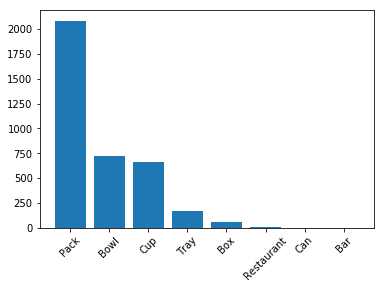

In [39]:
plt.bar(style_count.index,style_count)
plt.xticks(rotation = 45)

From here we can see that we could probably combine, the last three into an others category as they probably will not have a significant impact on our data anyway

In [43]:
# Explore Country Data
country_count = df["Country"].value_counts()
country_count

Japan                 681
United States         458
South Korea           411
Taiwan                372
China                 245
Thailand              212
Malaysia              207
Hong Kong             191
Indonesia             161
Singapore             140
Vietnam               124
UK                     75
Canada                 56
Philippines            51
India                  45
Mexico                 32
Germany                28
Australia              25
Brazil                 24
Netherlands            16
Nepal                  14
Myanmar                14
Bangladesh             12
Pakistan                9
Hungary                 9
Colombia                6
Poland                  6
France                  6
Cambodia                5
Sarawak                 5
Russia                  5
Peru                    4
Fiji                    4
Holland                 4
Italy                   4
Finland                 3
Spain                   3
Dubai                   3
Israel      

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 <a list of 51 Text xticklabel objects>)

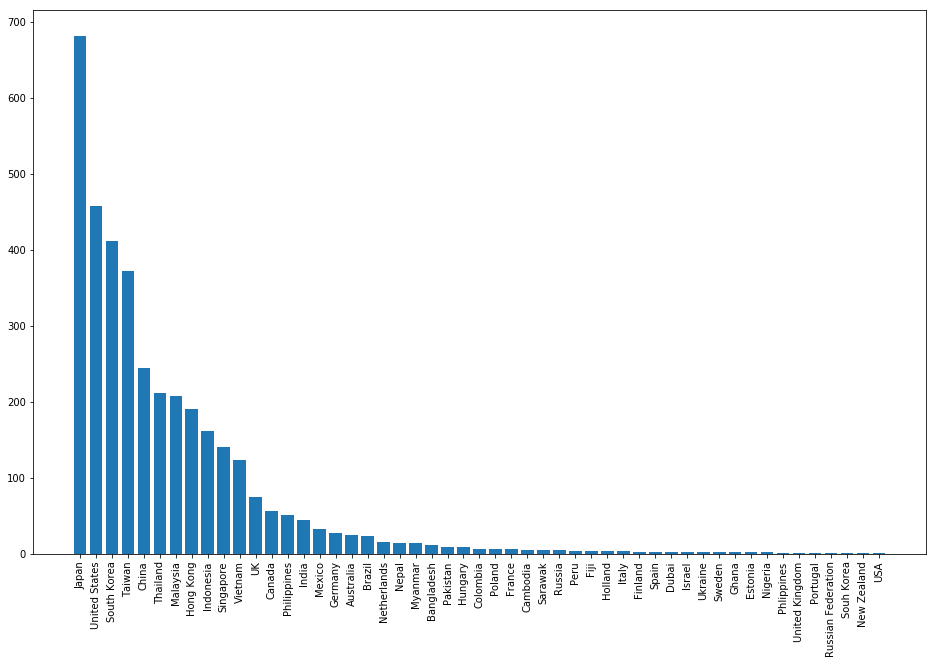

In [46]:
plt.figure(figsize= (16,10))
plt.bar(country_count.index,country_count)
plt.xticks(rotation = 90)

(array([  58.,   23.,   54.,   79.,  127.,  210.,  399., 1081.,  658.,
        1003.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

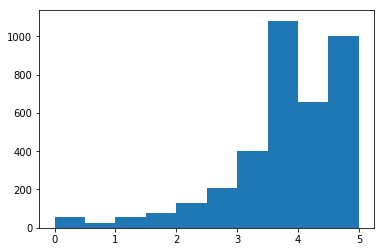

In [47]:
# Explore the star ratings:
plt.hist(df["Stars"])

In [48]:
df["Stars"].median()

3.75

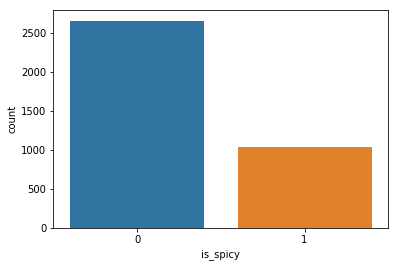

In [49]:
# Explore is_spicy
sns.countplot(df["is_spicy"])

In [ ]:
# Explore the rest:

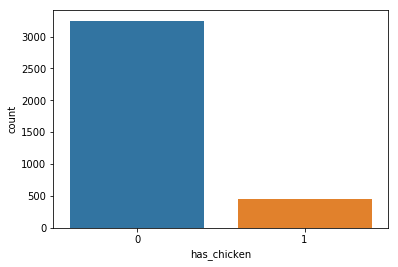

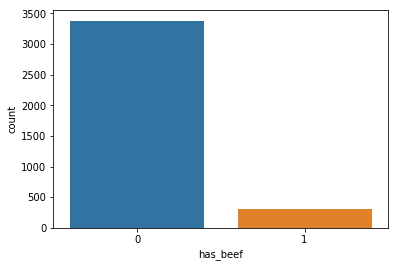

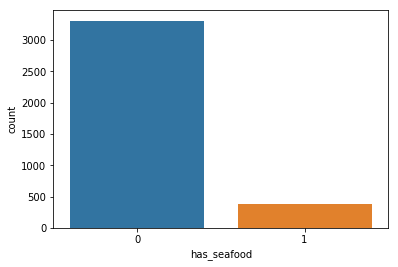

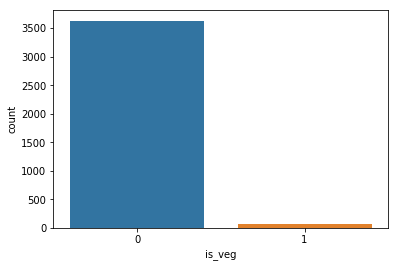

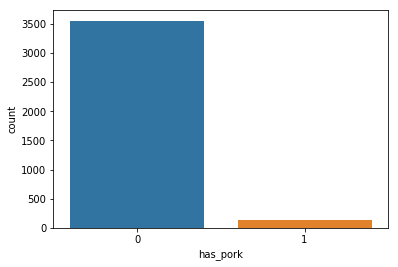

In [55]:
for x in df.columns[6:]:
    sns.countplot(df[x])
    plt.show()

## NOW WE MOVE ON
### Questions to ask:
1. Which brand has the highest stars?
2. Which country has the highest star?
3. Spicy or Non-Spicy: which does better?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

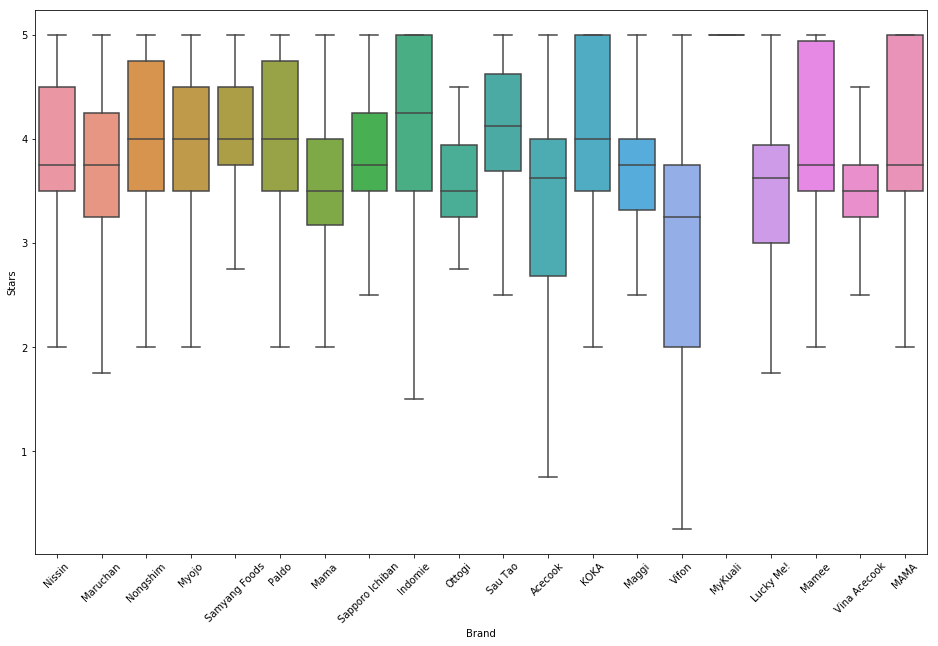

In [68]:
# Qn 1
plt.figure(figsize= (16,10))
sns.boxplot(df["Brand"],df["Stars"], order = brand_count.index[:20],
           showfliers = False)
plt.xticks(rotation = 45)

In [62]:
brand_count

Nissin                     476
Maruchan                   131
Nongshim                   119
Myojo                      111
Samyang Foods              102
Paldo                       84
Mama                        71
Sapporo Ichiban             69
Indomie                     56
Ottogi                      50
Sau Tao                     48
Acecook                     48
KOKA                        39
Maggi                       38
Vifon                       36
MyKuali                     35
Lucky Me!                   34
Mamee                       34
Vina Acecook                34
MAMA                        33
Ve Wong                     32
Master Kong                 29
Vedan                       28
JML                         28
Wei Lih                     28
Wai Wai                     26
A-Sha Dry Noodle            26
Wu-Mu                       23
Yum Yum                     23
Itsuki                      20
                          ... 
Kim's Bowl                   1
Taihodie

In [66]:
df[ df["Brand"] == "MyKuali" ]

,Brand,Variety,Style,Country,Stars,is_spicy,has_chicken,has_beef,has_seafood,is_veg,has_pork
188,MyKuali,White Fish Broth Cup Noodle,Cup,Malaysia,5.00,0,0,0,1,0,0
199,MyKuali,Penang Red Tom Yum Goong Rice Vermicelli Soup ...,Bowl,Malaysia,5.00,1,0,0,0,0,0
213,MyKuali,White Fish Broth Rice Vermicelli,Bowl,Malaysia,5.00,0,0,0,1,0,0
229,MyKuali,White Fish Broth Noodle,Pack,Malaysia,5.00,0,0,0,1,0,0
230,MyKuali,Penang White Curry Noodle (New Recipe),Pack,Malaysia,5.00,1,0,0,0,0,0
490,MyKuali,Gaeng Som Noodle,Cup,Malaysia,4.50,0,0,0,0,0,0
942,MyKuali,Hokkien Prawn (2018 Recipe),Pack,Malaysia,5.00,0,0,0,1,0,0
951,MyKuali,Penang Red Tom Yum Goong Noodle (2018 Recipe),Pack,Malaysia,5.00,1,0,0,0,0,0
958,MyKuali,Penang White Curry Noodle (2018 Recipe),Pack,Malaysia,5.00,1,0,0,0,0,0
1020,MyKuali,Penang White Curry Noodle,Pack,Malaysia,5.00,1,0,0,0,0,0


Therefore, MyKuali is the brand with highest stars

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

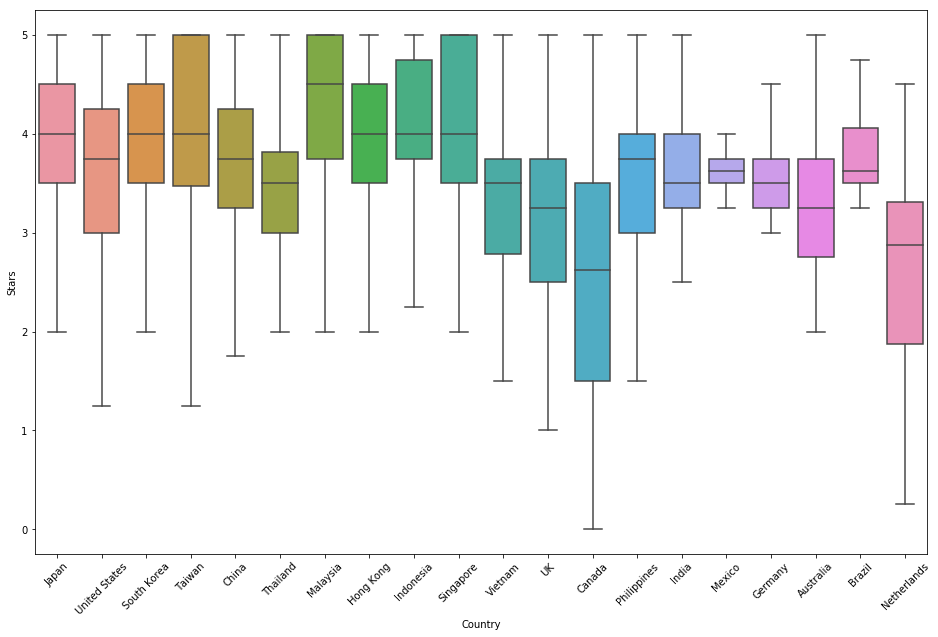

In [69]:
# Qn 2
plt.figure(figsize= (16,10))
sns.boxplot(df["Country"],df["Stars"], order = country_count.index[:20],
           showfliers = False)
plt.xticks(rotation = 45)

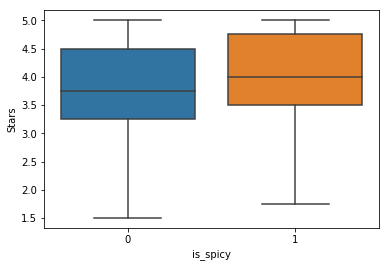

In [72]:
# Qn 3
sns.boxplot(df["is_spicy"],df["Stars"],
           showfliers = False)

In [73]:
spicy_df = df[df["is_spicy"]  == 1]
nonspicy_df = df[df["is_spicy"]  == 0]

In [74]:
print( spicy_df["Stars"].mean())
print( nonspicy_df["Stars"].mean())

3.845135527589545
3.675112824370064


In [75]:
print( spicy_df["Stars"].median())
print( nonspicy_df["Stars"].median())

4.0
3.75


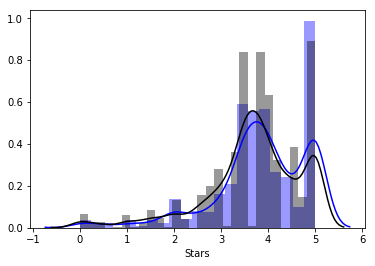

In [86]:
sns.distplot(spicy_df['Stars'], color = "blue")
sns.distplot(nonspicy_df['Stars'], color= "black")

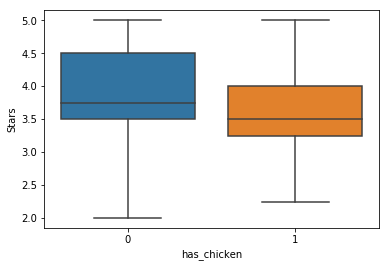

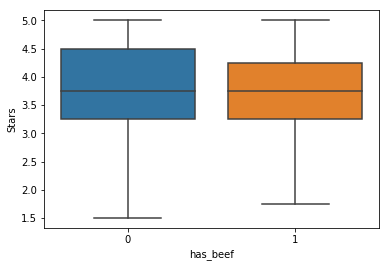

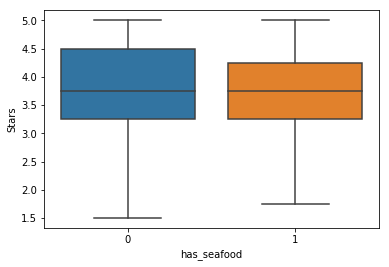

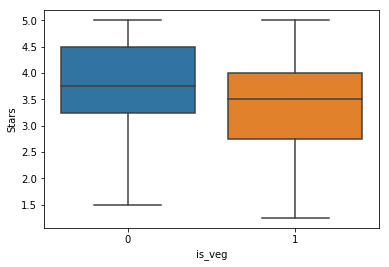

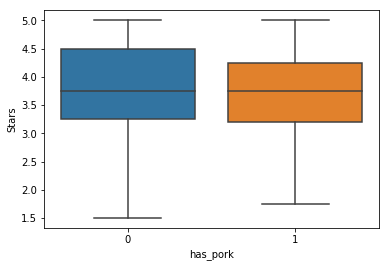

In [88]:
for x in df.columns[6:]:
    sns.boxplot(df[x],df["Stars"],
           showfliers = False)
    plt.show()

In [89]:
df.to_csv("thebiglist_clean_extended.csv", index = None)